# Least Squares Loss 
This notebook aims to help get a better understanding of the least squares loss function by computing the likelihood function, the negative log likelihood function, and the sum of squares function with the Gaussian Distribution as the chosen parametric distribution. 

**<ins>Note</ins>**: Review loss_functions.ipynb before to understand the likelihood and the negative log likelihood functions/equation format.

## Definition of Least Squares Loss
$$
L = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
The least squares loss is the sum of the squared difference between the predicted and the observed output value for each input value. The accuracy of the model depends on how small or big the least squares loss is, smaller values correlate with better accuracy of the model. The least squares loss is usually used for regression models.

### Imports 
Import the libraries needed to define, compute, and plot the likelihood function, the negative log likelihood function, the sum of squares function, and the Gaussian distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define the Rectified Linear Unit (ReLU) Function

In [2]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

### Define a Shallow Neural Network

In [3]:
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Ensure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x,(1,n_data))

    # Compute the hidden unit using matrix multiplication for the input array
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))

    # Compute the output of the shallow neural network using matrix multiplication for the input array
    y = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return y 

### Define Parameter Function 
Define a function to automatically define values to each parameter

In [4]:
def get_parameters():
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((1,1));  # formerly phi_0
  omega_1 = np.zeros((1,3)); # formerly phi_x

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 0.1
  omega_1[0,0] = -2.0; omega_1[0,1] = -1.0; omega_1[0,2] = 7.0

  return beta_0, omega_0, beta_1, omega_1

### Define Plotting Function

In [5]:
def plot_univariate_regression(x_model, y_model, x_data = None, y_data = None, sigma_model = None, title= None):
  # Format input and output data to 1D arrays
  x_model = np.squeeze(x_model)
  y_model = np.squeeze(y_model)

  fig, ax = plt.subplots()
  ax.plot(x_model,y_model)
  if sigma_model is not None:
    ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')
  ax.set_xlabel(r'Input, x'); ax.set_ylabel(r'Output, y')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if title is not None:
    ax.set_title(title)
  if x_data is not None:
    ax.plot(x_data, y_data, 'ko')
  plt.show()

### Define Training Data 
Define input/output pairs of 1D training data

In [6]:
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,\
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444, \
                    0.248038840,0.26824970])

### Define Parameters
Define beta_0, omega_0, beta_1, and omega_1 as parameters and sigma as the variance of the data

In [7]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2

### Define Input Values 
Define an input value (x_model) as an array of numbers from 0 to 1 with increments of 0.01 between each value

In [8]:
x_model = np.arange(0,1,0.01)

### Compute the Shallow Neural Network

In [9]:
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)

### Plot the Shallow Neural Network

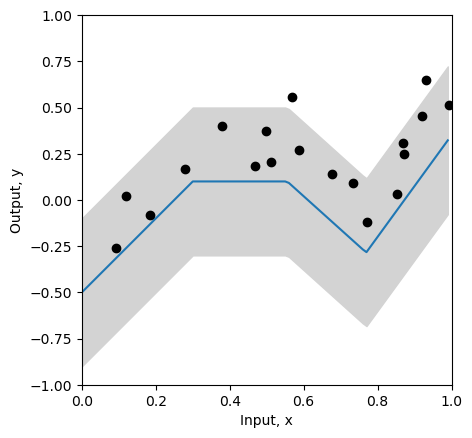

In [10]:
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma)

## Definition of a Gaussian Distribution
$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\!\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$
The gaussian distribution is a probability distribution that is characterized by its mean ($\mu$) and the standard deviation/spread of the data ($\sigma$)

### Define a Gaussian Distribution

In [11]:
def normal_distribution(y, mu, sigma):
    prob = (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(y-mu)**2)/(2*sigma**2))

    return prob

### Plot the Gaussian Distribution

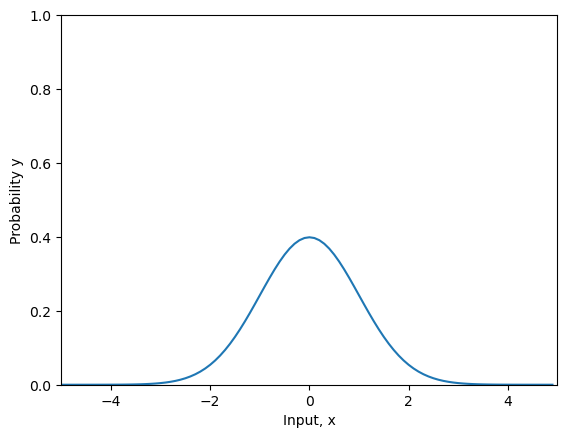

In [12]:
y_gauss = np.arange(-5,5,0.1)
mu = 0; sigma = 1.0
gauss_prob = normal_distribution(y_gauss, mu, sigma)
fig, ax = plt.subplots()
ax.plot(y_gauss, gauss_prob)
ax.set_xlabel(r'Input, x'); ax.set_ylabel(r'Probability y')
ax.set_xlim([-5,5]);ax.set_ylim([0,1.0])
plt.show()

## Likelihood Function
$$
\prod_{i=1}^{n} Pr(y_i \mid f(x; \phi)
$$

### Define a Likelihood Function (Gaussian Distribution) 
Define a likelihood function for the Gaussian Distribution

In [13]:
def compute_likelihood(y_train, mu, sigma):
  likelihood = np.prod((1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(y_train-mu)**2)/(2*sigma**2)))

  return likelihood

## Compute the Likelihood Function (Homeoscedastic Model) 
Compute the likelihood function for a homeoscedastic model (model with constant variance between data) predicting the mean of the Gaussian distribution

### Define Parameters

In [14]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2 # Variance

### Compute the shallow neural network 
Compute the shallow neural network using the parameters defined above, outputting the predicted mean of the Gaussian distribution for each input value.

In [15]:
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

### Compute the likelihood function
Compute the likelihood function using the predicted mean of the Gaussian distribution for each input value

In [16]:
likelihood = compute_likelihood(y_train, mu_pred, sigma)

## Negative Log Likelihood Function
$$
\Big( - \sum_{i=1}^{n} \log Pr(y_i \mid f(x_i; \theta) \Big)
$$

### Define a Negative Log Likelihood Function (Gaussian Distribution) 
Define a negative log likelihood function for the Gaussian Distribution

In [17]:
def compute_negative_log_likelihood(y_train, mu, sigma):
  nll = -np.sum(np.log((1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(y_train-mu)**2)/(2*sigma**2))))

  return nll

## Compute the Negative Log Likelihood Function (Homeoscedastic Model) 
Compute the negative log likelihood function for a homeoscedastic model predicitng the mean of the Gaussian distribution

### Define Parameters

In [18]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2 # Variance

### Compute the shallow neural network 
Compute the shallow neural network using the parameters defined above, outputting the predicted mean of the Gaussian distribution for each input value.

In [19]:
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

### Compute the negative log likelihood function
Compute the negative log likelihood function using the predicted mean of the Gaussian distribution for each input value

In [20]:
nll = compute_negative_log_likelihood(y_train, mu_pred, sigma)

## Sum of Squares 
$$
SS = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

where:  
- $y_i$ = actual data point  
- $\bar{y}$ = predicted data point
- $n$ = number of data points

### Define a Sum of Squares (Gaussian Distribution) 
Define a sum of squares for the Gaussian Distribution, which sums the squared difference between the predicted output value for each input value and the actual output value of that input value

In [21]:
def compute_sum_of_squares(y_train, y_pred):
  sum_of_squares = np.sum((y_train - y_pred)**2)

  return sum_of_squares

### Compute the Sum of Squares 
Compute the sum of squares function for a homeoscedastic model prediciting the mean of the Guassian distribution

### Define Parameters

In [22]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()

### Compute the shallow neural network 
Compute the shallow neural network using the parameters defined above, outputting the predicted mean of the Gaussian distribution

In [25]:
y_pred = mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

### Compute the sum of squares
Compute the sum of squares for the shallow neural network by taking the sum of the squared difference of the predicted mean of the Gaussian distribution and the actual mean of the Gaussian distribution for each input value

In [26]:
sum_of_squares = compute_sum_of_squares(y_train, y_pred)

## Minimize the Loss Function (beta_1)
Using the defined likelihood, negative log likelihood, and the sum of squares function, optimize beta_1 to minimize the loss function

### Define Parameters 
Define beta_1_vals as an array of input values from 0 to 1 with increments of 0.01 between each value. Define all the other parameters to be constants

In [27]:
beta_1_vals = np.arange(0,1.0,0.01)
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2

### Define Array Structure 
Define an array structure of 0s for the likelihood, negative log likelihood, and the sum of squares

In [28]:
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)
sum_squares = np.zeros_like(beta_1_vals)

### Compute the functions and plot the shallow neural network
Compute the likelihood, negative log likelihood, and the sum of squares for each beta_1 value in the defined array (beta_1_vals). Plot the shallow neural network for every 20th beta_1 value

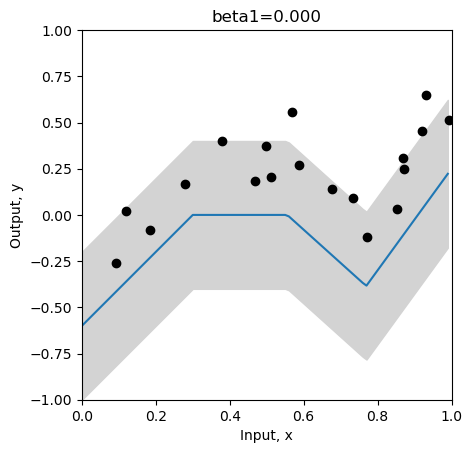

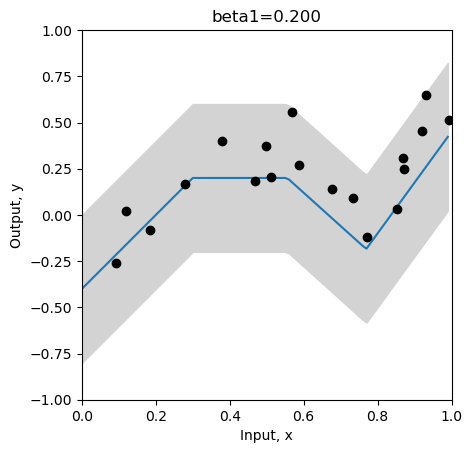

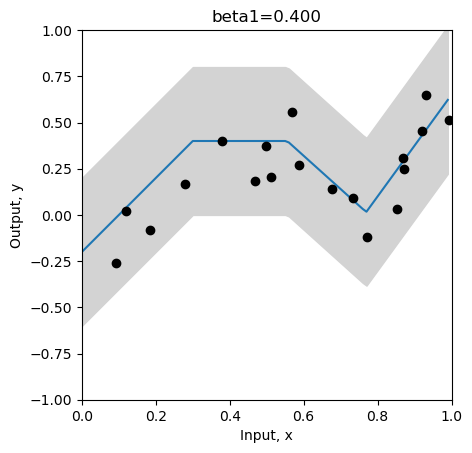

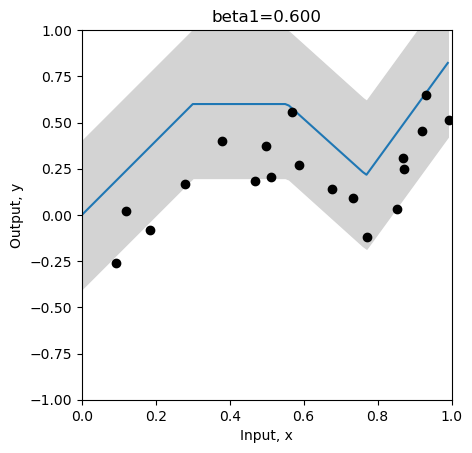

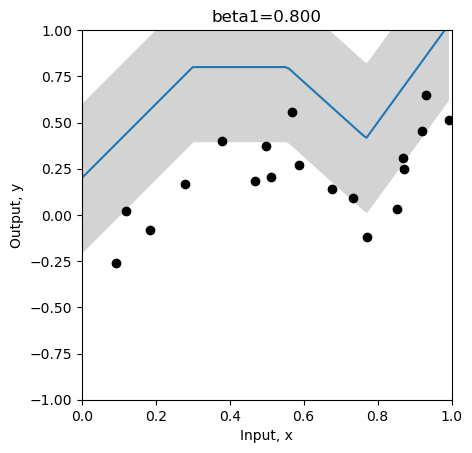

In [32]:
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]

  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

  # Compute and store the likelihood, negative log likelihood, and sum of squares
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)

  # Compute and plot the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))

### Plot the likelihood, negative log likelihood, and least squares function 
Plot the likelihood, negative log likelihood, and least squares function for each beta_1 value

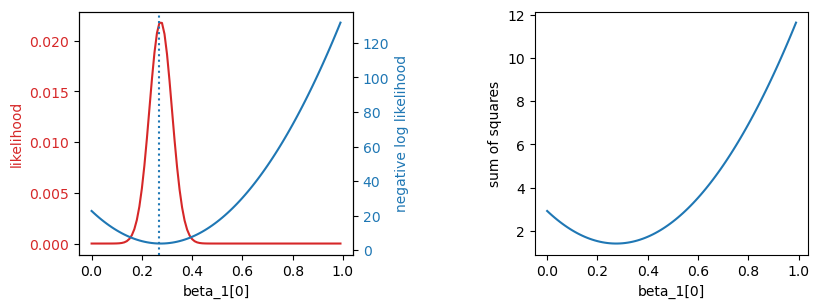

In [34]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'

ax[0].set_xlabel('beta_1[0]')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(beta_1_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(beta_1_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(beta_1_vals, sum_squares); ax[1].set_xlabel('beta_1[0]'); ax[1].set_ylabel('sum of squares')
plt.show()

### Print function values for the best beta_1 value
Using the beta_1 value that minimized the loss function the most, print the value of the maximum likelihood, minimum negative log likelihood, and least squares value for that beta_1 value

In [35]:
print("Maximum likelihood = %3.3f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))
print("Least squares = %3.3f, at beta_1=%3.3f"%( (sum_squares[np.argmin(sum_squares)],beta_1_vals[np.argmin(sum_squares)])))

Maximum likelihood = 0.022, at beta_1=0.270
Minimum negative log likelihood = 3.826, at beta_1=0.270
Least squares = 1.411, at beta_1=0.270


### Plot the best model 
Plot the model with the beta_1 value that results in the smallest sum of squares output

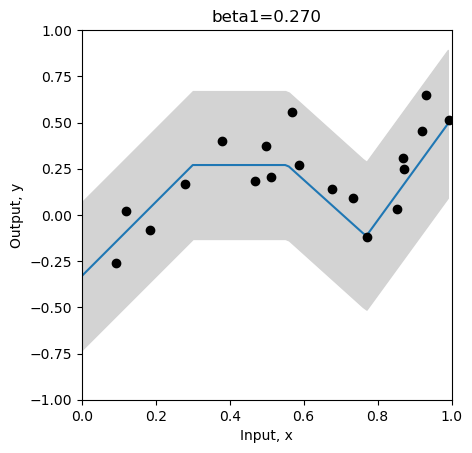

In [36]:
beta_1[0,0] = beta_1_vals[np.argmin(sum_squares)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))

## Minimize the Loss Function (sigma) 
Using the defined likelihood, negative log likelihood, and the sum of squares function, optimize sigma to minimize the loss function

### Define Parameters
Define sigma as an array of input values from 0.1 to 0.5 with increments of 0.005 between each value. Define all the other parameters to be constants

In [37]:
sigma_vals = np.arange(0.1,0.5,0.005)
beta_0, omega_0, beta_1, omega_1 = get_parameters()
beta_1[0,0] = 0.27

### Define Array Structure 
Define an array structure of 0s for the likelihood, negative log likelihood, and sum of squares values

In [38]:
likelihoods = np.zeros_like(sigma_vals)
nlls = np.zeros_like(sigma_vals)
sum_squares = np.zeros_like(sigma_vals)

### Compute the functions and plot the shallow neural network
Compute the likelihood, negative log likelihood, and the sum of squares for each sigma value in the defined array (beta_1_vals). Plot the shallow neural network for every 20th sigma value

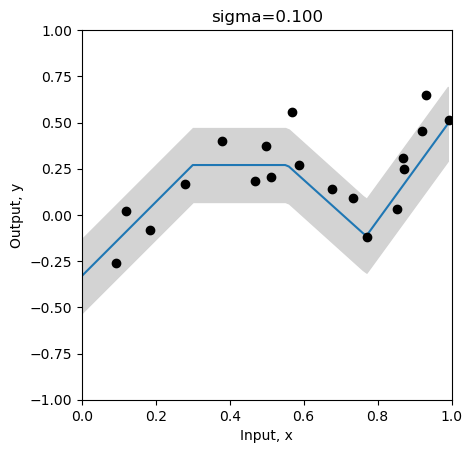

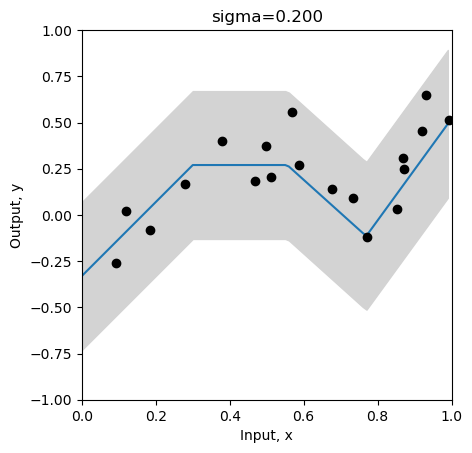

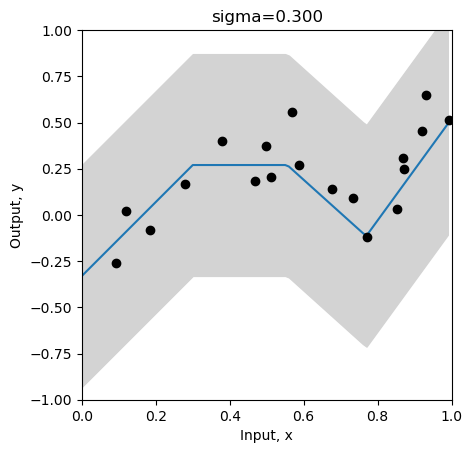

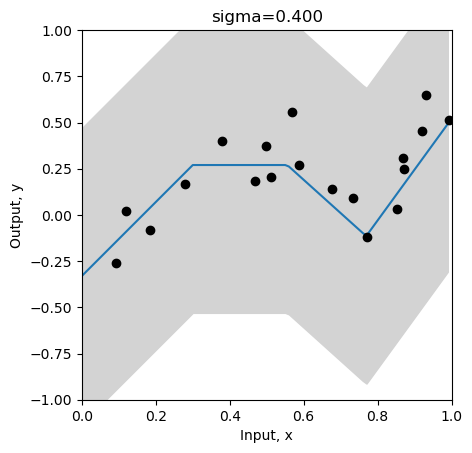

In [39]:
for count in range(len(sigma_vals)):
  # Set the value for the parameter
  sigma = sigma_vals[count]

  # Compute the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

  # Compute and store the likelihood, negative log likelihood, and sum squares
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)

  # Plot the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model=sigma, title="sigma=%3.3f"%(sigma))

### Plot the likelihood, negative log likelihood, and least squares function 
Plot the likelihood, negativve log likelihood, and least squares function for each sigma value

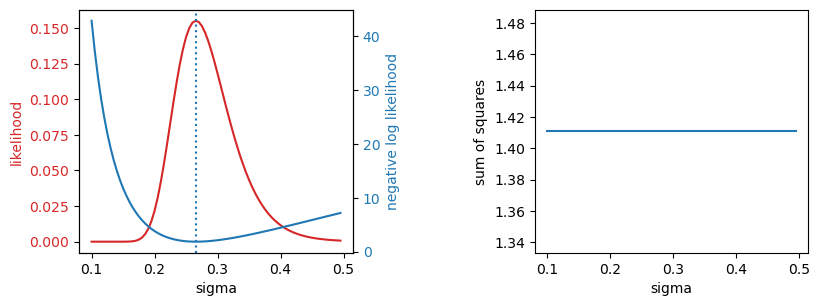

In [40]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'

ax[0].set_xlabel('sigma')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(sigma_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(sigma_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = sigma_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(sigma_vals, sum_squares); ax[1].set_xlabel('sigma'); ax[1].set_ylabel('sum of squares')
plt.show()

### Print function values for the best sigma value
Using the sigma value that minimized the loss function the most, print the value of the maximum likelihood, minimum negative log likelihood, and least squares value for that sigma value

In [41]:
print("Maximum likelihood = %3.3f, at sigma=%3.3f"%( (likelihoods[np.argmax(likelihoods)],sigma_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at sigma=%3.3f"%( (nlls[np.argmin(nlls)],sigma_vals[np.argmin(nlls)])))

Maximum likelihood = 0.155, at sigma=0.265
Minimum negative log likelihood = 1.864, at sigma=0.265


### Plot the best model 
Plot the model with the sigma value that resulted in the smallest least squares loss output

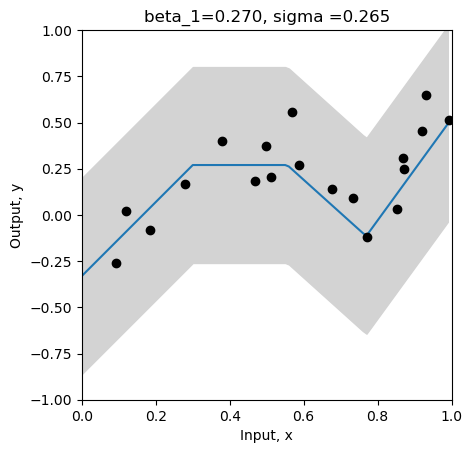

In [42]:
sigma= sigma_vals[np.argmin(nlls)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta_1=%3.3f, sigma =%3.3f"%(beta_1[0,0],sigma))    